## **Задача 1**

$A = [ P - оракул ], B = [n\; угадываний\; из\; n]$.

$P(A|B) = \frac{P(B|A)P(A)}{ P(B|A)P(A) + P(B|\overline{A} P(\overline{A})} = \frac{p_1^n\cdot 10^{-4}}{p_1^n\cdot 10^{-4}+p_2^n\cdot (1-10^{-4})} = \frac{1}{29} = 3,45\%$

In [1]:
import numpy as np
import scipy.special

bin_coef = lambda n,p: scipy.special.binom(n, p)
def F(n,p,s):
  sum = 0
  for i in range(s):
    sum += bin_coef(n,i)*p**i*(1-p)**(n-i)
  return sum

In [2]:
print(F(100,0.9, 75), 1-F(100,0.5, 75))

4.099883711685064e-06 2.818141017213449e-07


Вероятность того, что оракул угадает меньше обычного человека за 100 бросков ничтожно мала: то что оракул угадает меньше $75$ бросков уже 4е-6$ = 0.0004\%$, а то что обычный человек угадает больше $75$ бросков 3e-7$ = 0.00003\%$. При увеличении кол-ва бросков k случайная величина кол-ва бросков, которая является биноминальной, можно будет приблизить нормальным распределением в силу ЦПТ, пики нормальных распределений бросков оракула и обычного человека будут сильно разделены и вероятность того, что обычный человек угадает лучше оракула будут стремиться к $0$ при $k \gg 1$. Поэтому вероятность того, что выбранный человек, оказавшийся лучшим из $100$, будет оракулом будет почти в точности равна вероятности того, что среди этих 100 человек есть оракул.

Таким образом новая априорная вероятность того, что $P$~---~оракул будет равна просто вероятности того, что среди этих $100$ чеовек есть оракул:

$P(A) = 1 - P(\overline A) \approx 1 - P(среди\; 100\; человек\; нет\; оракула) = 1 - (1-10^{-4})^{100} = 1 - 0.99005 \approx 0.01$

In [3]:
print((1 - 10**(-4))**100)

0.9900493386913719


Сэмплируем выборки и экспериментально оценим вероятность.

In [4]:
!pip install scipy
import scipy.stats as st

In [5]:
# Генерируем выборку из 100 человек (кол-во оракулов)
def generate_sample_oracle_and_man():
  r = st.bernoulli.rvs(10**(-4), size=100)
  return sum(r)

# Наши 100 человек бросают монеты k раз
def experiment(k):
  Num_oracles = generate_sample_oracle_and_man()
  if Num_oracles > 0:
    oracles = st.binom.rvs(k, 0.9, size = Num_oracles)
  else: 
    return 0
  mans = st.binom.rvs(k, 0.5, size = 100-Num_oracles)
  return max(oracles) > max(mans)

# Проводим эксперимент s раз, чтобы оценить априорную вероятность
def experiment_s(s, k):
  amount = 0
  for i in range(s):
    amount += experiment(k)
  return amount/s

In [6]:
# Для разных k проводим по 100000 экспериментам, чтобы усреднить по ним.
prob = np.zeros(100)
for i in range(100):
  prob[i] = experiment_s(100000, 10*i+1)

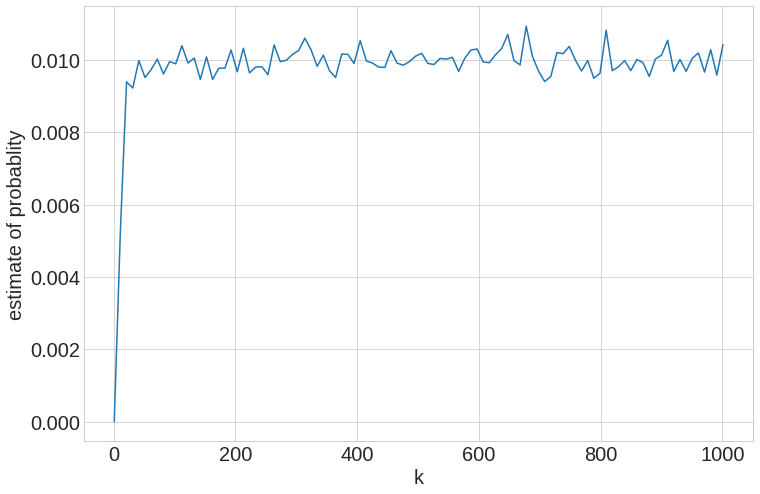

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"k", fontsize=fontsize)
plt.ylabel(r"estimate of probablity", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(1, 1001, 100)
ax.plot(x, prob);

# Задача 2

Пусть наша гипотеза заключается в том, что десятипроцентный квантиль распределения величины $x_i$ равен $0$. Тогда величина $\xi_i = [ x_i > 0 ] = B(0.1)$. Тогда в соответствии с нашей гипотезой, $E\xi_i = 0.1$. В качестве статистики возьмем $T(x) = \sum\limits_{i=1}^{n} \xi_i = P(n, 0.1)$

Критическая область будет отличаться для разных $n$. Напишем функцию находящую критическую область.

In [8]:
m0 = 0.1

def find_right_critical(n, ralpha):
  integ = 0
  for i in range(n):
    integ += bin_coef(n, n-i)*m0**i*(1-m0)**(n-i)
    if integ > ralpha:
      return n - i

def find_left_critical(n, lalpha):
  integ = 0
  for i in range(n):
    integ += bin_coef(n, i)*m0**(n-i)*(1-m0)**i
    if integ > lalpha:
      return i

# Функция подсчета эмпирического значения критерия
def Crit(x):
  ksi = [ el > 0.1 for el in x]
  return sum(ksi)

Теперь можно взять выборку, посчитать критическую область и проверить попадает ли значение критерия в нее. Если попадает - гипотеза о равенстве матожидания $0.1$ отвергается.

In [9]:
alpha = 0.05
n = 10
x = np.random.random_sample(n) - 0.1

print("Выборка: ", x)
print("Критическая область: меньше ", find_left_critical(n, alpha/2), " и больше", find_right_critical(n, alpha/2))
print("Эмпирическое значение критерия T(x) на выборке равно", Crit(x))
print(f"При n = {n} и генерации x из равномерного распредления из [−0.1,0.9) всегда значение оказалось T(x) равным {Crit(x)}, то есть не заходит в критеческую область - нулевая гипотеза не опровргается.")

Выборка:  [-0.02313727  0.02779809  0.70238508  0.14924729  0.58292485  0.74059477
  0.22678382  0.20930723  0.43968397  0.31185527]
Критическая область: меньше  7  и больше 10
Эмпирическое значение критерия T(x) на выборке равно 8
При n = 10 и генерации x из равномерного распредления из [−0.1,0.9) всегда значение оказалось T(x) равным 8, то есть не заходит в критеческую область - нулевая гипотеза не опровргается.


In [10]:
alpha = 0.05
n = 10
x = np.random.random_sample(n) - 0.4

print("Выборка: ", x)
print("Критическая область: меньше ", find_left_critical(n, alpha/2), " и больше", find_right_critical(n, alpha/2))
print("Эмпирическое значение критерия на выборке x равно", Crit(x))
print(f"При n = {n} и генерации x из равномерного распредления из [−0.4,0.6) всегда значение оказалось T(x) равным {Crit(x)}, то есть попадает в критеческую область - нулевая гипотеза опровргается.")

Выборка:  [-0.0721062  -0.14016713 -0.05233943  0.36203114 -0.16852418 -0.35218628
  0.12762383 -0.17365406  0.38410738  0.47714106]
Критическая область: меньше  7  и больше 10
Эмпирическое значение критерия на выборке x равно 4
При n = 10 и генерации x из равномерного распредления из [−0.4,0.6) всегда значение оказалось T(x) равным 4, то есть попадает в критеческую область - нулевая гипотеза опровргается.


# Задача 3

а) Вообще функция рапределения двух нормальных величин записывается через функцию Бесселя второго рода, а найти распределение суммы $n$ таких величин представляется проблемным. Поэтому в силу ЦПТ при достаточно больших $n$ будем считать распределение $T(Z)$ нормальным. Найдем его мат. ожидание и дисперсию.

$\rho = cov(x_iy_i) = E(x_iy_i) - Ex_iEy_i = E(x_iy_i)$

$D(x_iy_i) = E(x^2_iy_i^2) - 2\rho E(x_iy_i) + \rho^2 = E(x^2_iy_i^2) - \rho^2 = cov(x_i^2)cov(y_i^2) + 2(cov(x_iy_i))^2 - \rho^2 = 1 + 2\rho^2 - \rho^2 = 1 + \rho^2$

Следовательно, $T(Z) = N(\rho, \frac{1}{n}(1 + \rho^2))$ 

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

n = 100

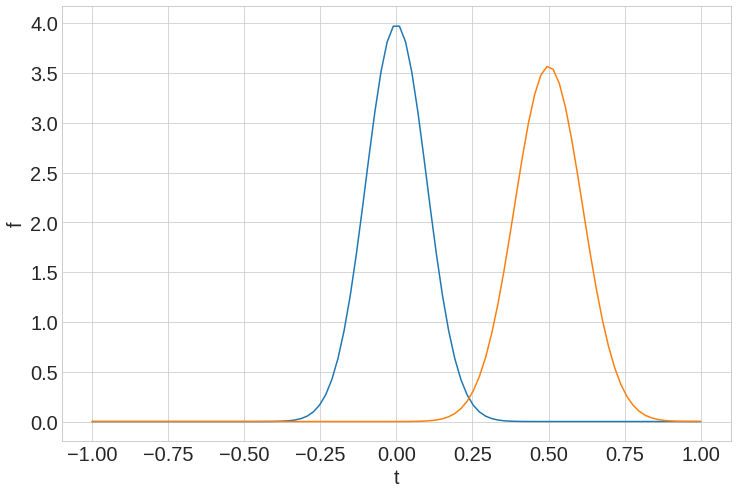

In [36]:
# Построим графики для плотностей при rho = 0 и 0.5
def f(x, rho):
  E = rho
  D = 1/n*(1 + rho**2)
  return 1/np.sqrt(2*np.pi*D)*np.exp(-(x-E)**2/(2*D))

f1 = lambda x: f(x, 0)
f2 = lambda x: f(x, 0.5)

plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"t", fontsize=fontsize)
plt.ylabel(r"f", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(-1, 1, 100)
ax.plot(x, f1(x))
ax.plot(x, f2(x))

б) Плотность распределения $T(Z)$ равна $f(x;\rho,n) = \frac{1}{\sqrt{2\pi\cdot \frac{1-\rho^2}{n}}}\exp\left(-\frac{(x-\rho)^2}{2\frac{1-\rho^2}{n}}\right)$. Сначала найдем мощность аналитически. Для этого нужно определеить критическую область. Выберем уровень значимости $\alpha = 0.05$. Из таблицы с википедии 2.5% квантиль нормального стандартного распределения $N(0,1)$ равен $1,96$. При $\rho = 0$ распределение T(Z) почти совпадает с $N(0,\frac{1}{n})$. Значит, 2.5% квантиль для него будет равен $\frac{1.96}{\sqrt{n}}$. Мощность критерия будет равна

$1-\beta(\rho, n) = \int\limits_{-\infty}^{-1,96/\sqrt{n}} f(x;\rho, n)dx + \int\limits_{1,96/\sqrt{n}}^{+\infty} f(x;\rho, n)dx 
= \int\limits_{-\infty}^{-1,96/\sqrt{n}} \frac{1}{\sqrt{2\pi\cdot \frac{1-\rho^2}{n}}}\exp\left(-\frac{(x-\rho)^2}{2\frac{1-\rho^2}{n}}\right) dx
+ \int\limits_{1,96/\sqrt{n}}^{+\infty} \frac{1}{\sqrt{2\pi\cdot \frac{1-\rho^2}{n}}}\exp\left(-\frac{(x-\rho)^2}{2\frac{1-\rho^2}{n}}\right)dx
=\int\limits_{-\infty}^{\frac{-1,96-\rho\sqrt{n}}{\sqrt{1-\rho^2}}} \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y^2}{2}\right)dy
+\int\limits_{\frac{1,96-\rho\sqrt{n}}{\sqrt{1-\rho^2}}}^{\infty} \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y^2}{2}\right)dy = F(\frac{-1,96-\rho\sqrt{n}}{\sqrt{1-\rho^2}})+(1-F(\frac{1,96-\rho\sqrt{n}}{\sqrt{1-\rho^2}})),$

где $F$ - функция стандартного нормального распредления.

In [37]:
from scipy import integrate
rho = 0.5
calculate_M = lambda rho : integrate.quad(lambda x : f(x,rho), -100, -1.96/np.sqrt(n))[0] + integrate.quad(lambda x : f(x,rho), 1.96/np.sqrt(n), 100)[0]
M = calculate_M(0.5)
print(f"Мощность критерия при n = {n}, rho = {rho} равна", M)

Мощность критерия при n = 100, rho = 0.5 равна 0.9967266001797719


In [38]:
i, p = 0, 200
interval = 0.6
M = np.zeros(p)
for rho in np.linspace(-interval, interval, p):
  M[i] = calculate_M(rho)
  i += 1

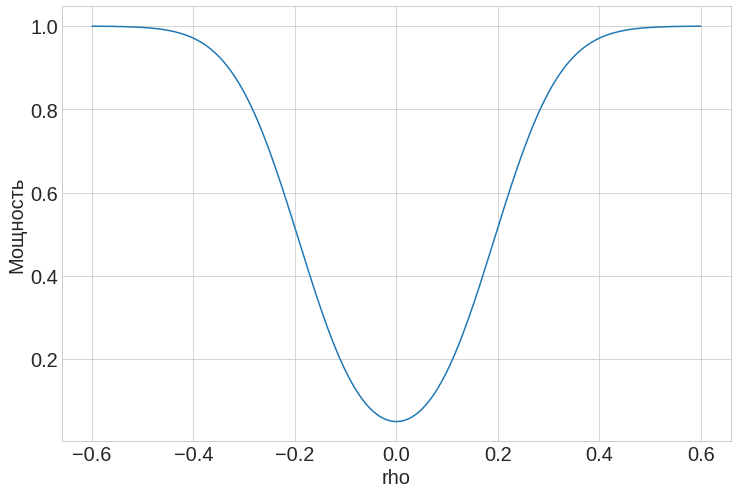

In [39]:
plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"rho", fontsize=fontsize)
plt.ylabel(r"Мощность", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(-interval, interval, p)
ax.plot(x, M)

Теперь займемся сэмплированием выборок с разными $\rho$ и тестированием гипотезы.

In [40]:
# Проведение серии из Num_exp эксперименов для выбранного rho, возвращает количество случаев, когда гипотеза отвергается
def generate_sample_and_testing(rho, Num_exp):
  K = np.matrix([[1,rho],[rho,1]])
  means = np.zeros(2)

  results = np.zeros(Num_exp)
  for i in range(Num_exp):
    data = np.random.multivariate_normal(means, K, n)
    # Значение критерия
    T = sum([a*b for a,b in data])/n
    results[i] = T < -1.96/np.sqrt(n) or T > 1.96/np.sqrt(n)
  return sum(results)/Num_exp

n = 100
Num_exp = 500

i, p = 0, 200
M1 = np.zeros(p)
for rho in np.linspace(-interval, interval, p):
  M1[i] = generate_sample_and_testing(rho, Num_exp)
  i += 1

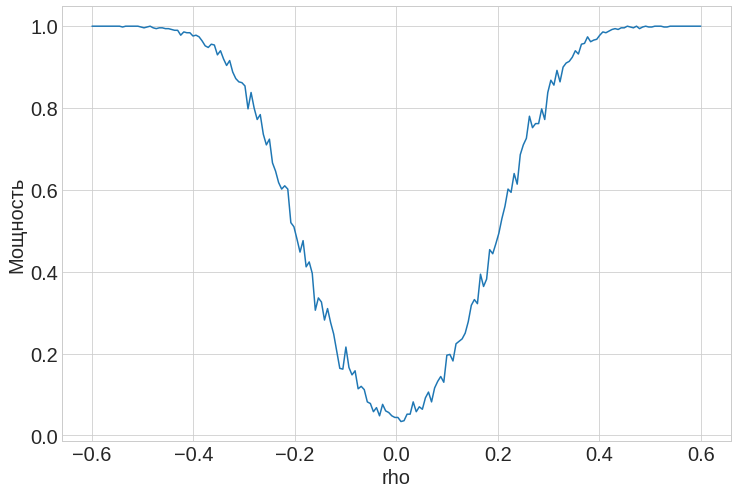

In [41]:
plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"rho", fontsize=fontsize)
plt.ylabel(r"Мощность", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(-interval, interval, p)
ax.plot(x, M1)

Можно сделать вывод о том, что если рассматривалось не большое кол-во пар $(x,y)$ и была обнаружена высокая корреляция, то в силу черезвычайной маловероятности такого события, можно сделать вывод, что между этими данными есть какая-то причинно-следственая связь, напрямую или через какой-то скрытое явление.

Так же можно в очередной раз убедиться в справедливости ЦПТ.

Сравним эту статистику со статистикой, рассмотренной на лекции. При больших $n$ распределения обоих статистик будут стремиться к нормальному арспределению. Найдем примерную функцию распределения для статистики с лекции 

$T_2(Z) = \frac{1}{2n}\sum\limits_{i=1}^n (x_i-y_i)^2 = \frac{1-\rho}{n}\chi^2(n)$. 

$F_{T_2}(x) = P(\frac{1-\rho}{n}\chi^2(n) < x) = P(\chi^2(n) < \frac{nx}{1-\rho}) = F_{\chi^2(n)}(\frac{nx}{1-\rho})$.

Но при больших $n$ эта статистика тоже будет стремиться к нормальному. Найдем мат. ожидание и дисперсию.

$E[\frac{1-\rho}{n}\chi^2(n)] = \frac{1-\rho}{n}\cdot n = 1-\rho$,

$D[(x_i-y_i)^2] = E[((x_i-y_i)^2-(2-2\rho))^2] = E[(x_i-y_i)^4] - (2-2\rho)^2 = E[x_i^4] - 4E[x_i^3y_i] + 6E[x_i^2y_i^2]-4E[x_iy_i^3]+E[y_i^4] - (2-2\rho)^2 = 3 - 12\rho+6(1+2\rho^2)-12\rho+3-(2-2\rho)^2 = 8-16\rho+8\rho^2= 8(1-\rho)^2$

$D[\frac{1-\rho}{n}\chi^2(n)] = D[\frac{1}{2n}\sum\limits_{i=1}^n (x_i-y_i)^2] = \frac{1}{4n^2}\cdot n \cdot 8(1-\rho)^2 = \frac{2(1-\rho)^2}{n}$

Напомню, что мат. ожидание и дисперсия статистики $T_1(Z) = \frac{1}{n}\sum\limits_{i=1}^n x_iy_i$ равно $\rho$ и $\frac{1}{n}(1+\rho^2)$ соответсвенно.

При отклонения от нулевой гипотезы, то есть отклонение $\rho$ от $0$, расстояние между пиками распределений статистики $T_2(Z) = \frac{1}{2n}\sum\limits_{i=1}^n (x_i-y_i)^2$ при $\rho = 0$ и $\rho=\rho_0$ равно $\rho_0$ (координаты пиков равны мат. ожиданию). В случае статистики $T_1(Z) = \frac{1}{n}\sum\limits_{i=1}^n x_iy_i$ расстояние между пиками равно тоже $\rho_0$. Это расстояние для обоих статистик одинаковое.

С увеличением $n$ дисперсия обоих статистик изменяется одинаково (уменьшается в $n$ раз). Найдем у какой статситики дисперсия больше в зависмости от $\rho$.

При $\rho =0$ у дисперсия $T_1$ меньше.

$1+\rho^2 = 2(1-\rho)^2$

$\rho^2-4\rho+1=0$

$\rho = 2\pm\sqrt{3}$

Значит, если $\rho\in[2-\sqrt{3},2+\sqrt{3}]\cap[0,1]=[2-\sqrt{3},1]$, тогда дисперсия у $T_2$  будет меньше, а в остальных случаях у $T_1$. Значит, при $\rho<2-\sqrt{3}$ однозначно лучше $T_1$.



$2.5\%$ квантиль $T_2$ будет примерно $1.96\cdot\frac{2}{\sqrt n}$, основываясь на квантилях нормального стандартного распределения. Переносим пик из $0$ в $1$ - получаем левые и правые квантили $-1.96\cdot\frac{2}{\sqrt n}+1$ и $1.96\cdot\frac{2}{\sqrt n}+1$. Проинтегрируем и посчитаем мощность в зависмости от $\rho$.

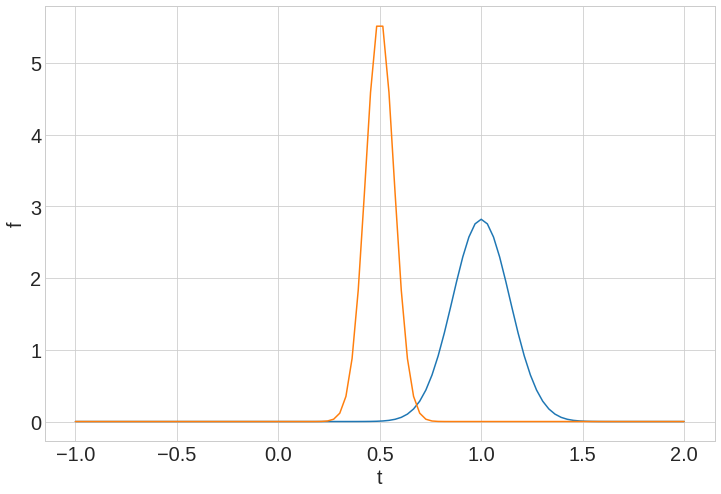

In [42]:
def f(x, rho):
  E = 1-rho
  D = 2/n*(1 - rho)**2
  return 1/np.sqrt(2*np.pi*D)*np.exp(-(x-E)**2/(2*D))

f1 = lambda x: f(x, 0)
f2 = lambda x: f(x, 0.5)


# Графики для rho 0 и 0,5
plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"t", fontsize=fontsize)
plt.ylabel(r"f", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(-1, 2, 100)
ax.plot(x, f1(x))
ax.plot(x, f2(x))

In [43]:
calculate_M2 = lambda rho : integrate.quad(lambda x : f(x,rho), -100, -1.96*2/np.sqrt(n)+1)[0] + integrate.quad(lambda x : f(x,rho), 1.96*2/np.sqrt(n)+1, 100)[0]

i, p = 0, 200
interval = 0.6
M2 = np.zeros(p)
for rho in np.linspace(-interval, interval, 200):
  M2[i] = calculate_M2(rho)
  i += 1

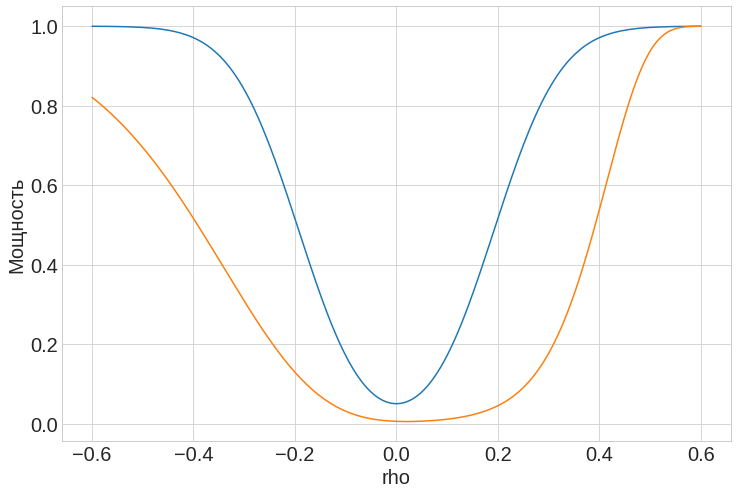

In [44]:
plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"rho", fontsize=fontsize)
plt.ylabel(r"Мощность", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(-interval, interval, 200)
ax.plot(x, M)
ax.plot(x, M2)

Из графика мощности видно, что $T_1(Z) = \frac{1}{n}\sum\limits_{i=1}^n x_iy_i$ (синяя линия) всегда имеет большую мощность, чем $T_2(Z) = \frac{1}{2n}\sum\limits_{i=1}^n (x_i-y_i)^2$ (красная). Поэтому использование  $T_1(Z)$ для этой задачи предпочтительнее.

# Задача 4

In [45]:
# Генерирует x и генерирует y, пока не будет корреляция R_max с x, возвращает кол-во генераций
def get_num_for_cor(R_max):
  x = np.random.normal(0, 1, 12)
  mean_x = sum(x)/x.shape[0]
  C_x = x - mean_x
  CN_x = C_x/np.sqrt(C_x.dot(C_x))

  found, K = 0, 0
  while not found:
    K += 1
    y = np.random.normal(0, 1, 12)
    mean_y = sum(x)/x.shape[0]
    C_y = y - mean_y
    CN_y = C_y/np.sqrt(C_y.dot(C_y))
    R = CN_y.dot(CN_x)
    found = R > R_max
  return K

In [46]:
R_max = 0.97
print(f"Для корреляции в R = {R_max} нужно перебрать примерно K = {get_num_for_cor(R_max)} векторов")

Для корреляции в R = 0.97 нужно перебрать примерно K = 9128974 векторов


In [47]:
i, p = 0, 20
K = np.zeros(p)
for R in np.linspace(0, 0.97, p):
  K[i] = get_num_for_cor(R)
  i += 1

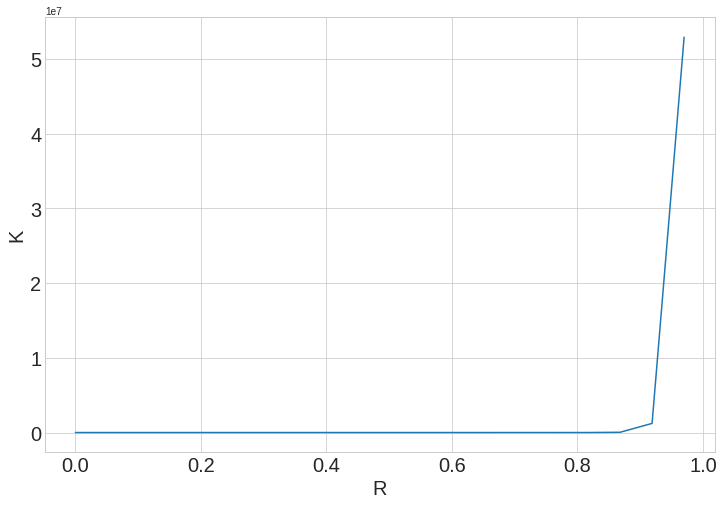

In [55]:
plt.figure(figsize=(12, 8))
fontsize=20

ax = plt.axes()
plt.xlabel(r"R", fontsize=fontsize)
plt.ylabel(r"K", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

x = np.linspace(0, 0.97, p)
ax.plot(x, K)

# Задача 5

Если разделяющая поверхность в классификаторе будет линейной, а выборки будут располагаться на плоскости в форме двух полумесяцев, то может так получиться, то классификатор правльно классифицирует только $50\%$ объектов. Картинку с примером выборки приложу к письму.

# Задача 6

In [56]:
# Принимает параметр распределения, кол-во выборок и квантиль для норм. станд. распределения
def generate_sample_and_testing_quantile(rho, Num_exp, q):
  K = np.matrix([[1,rho],[rho,1]])
  means = np.zeros(2)

  results = np.zeros(Num_exp)
  for i in range(Num_exp):
    data = np.random.multivariate_normal(means, K, n)
    # Значение критерия
    T = sum([a*b for a,b in data])/n
    results[i] = T < -q/np.sqrt(n) or T > q/np.sqrt(n)
  return sum(results)/Num_exp




In [74]:
# Генерируем выборки и смотрим в скольких выборках гипотеза была отвергнута. Используем статистику усредненное произведение x y
Tr = generate_sample_and_testing_quantile(0, 1000, 1.96)
Fal = generate_sample_and_testing_quantile(0.2, 1000, 1.96)
print(f"Доля отвергнутых гипотез в выборках, удовлетворяющей гипотезе {Tr}, а в выборках, не удовлетворяющей гипотезе, отвергнутых {Fal}")
print(f"То есть ложно отклоненных {Tr}, а ложно принятых {1- Fal}")

Доля отвергнутых гипотез в выборках, удовлетворяющей гипотезе 0.043, а в выборках, не удовлетворяющей гипотезе, отвергнутых 0.5
То есть ложно отклоненных 0.043, а ложно принятых 0.5


Воспользуемся поправкой Бонферрони. Тогда $\alpha=0.05/1000=0.00005$. $0.0025\%$ квантиль нормального стандартного распределения равен примерно $4.1$.

In [75]:
Tr = generate_sample_and_testing_quantile(0, 1000, 4.1)
Fal = generate_sample_and_testing_quantile(0.2, 1000, 4.1)
print(f"Доля отвергнутых гипотез в выборке, удовлетворяющей гипотезе {Tr}, а в выборке, не удовлетворяющей гипотезе, отвергнутых {Fal}")
print(f"То есть ложно отклоненных {Tr}, а ложно принятых {1- Fal}")

Доля отвергнутых гипотез в выборке, удовлетворяющей гипотезе 0.0, а в выборке, не удовлетворяющей гипотезе, отвергнутых 0.035
То есть ложно отклоненных 0.0, а ложно принятых 0.965
